<a href="https://colab.research.google.com/github/tuantran221/Project_Machine_Learning/blob/main/Loading_in_your_own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Project_ML/

/content/drive/MyDrive/Project_ML


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [8]:
DATADIR = "dataset/PetImages" # load dataset

CATEGORIES = ["Dog", "Cat"]

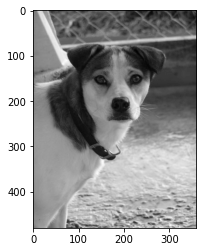

In [9]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [10]:
print(img_array)

[[119 121 122 ...  36  35  33]
 [117 120 121 ...  36  33  27]
 [117 120 122 ...  52  39  27]
 ...
 [123 124 126 ... 160 159 165]
 [121 123 124 ... 174 168 181]
 [119 120 122 ... 168 162 161]]


In [11]:
print(img_array.shape) # print shape of array

(480, 360)


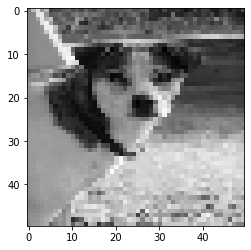

In [12]:
# resize image 
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

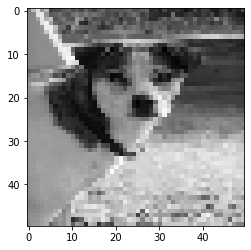

In [13]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [14]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|██████████| 12501/12501 [31:47<00:00,  6.55it/s]

24946


In [15]:
# data haven't been mix
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [16]:
import random

random.shuffle(training_data) # to mix data between dog and cat

In [17]:
# this is train data after mixing
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
0
1
0
0
0


In [28]:
X = [] # create array of features X
y = [] # create array of label y 

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
# conver feature X and y label to array 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[149]
   [185]
   [156]
   ...
   [112]
   [111]
   [108]]

  [[148]
   [164]
   [156]
   ...
   [115]
   [114]
   [111]]

  [[155]
   [158]
   [161]
   ...
   [119]
   [118]
   [116]]

  ...

  [[ 99]
   [106]
   [103]
   ...
   [122]
   [122]
   [124]]

  [[ 93]
   [ 96]
   [ 97]
   ...
   [126]
   [128]
   [132]]

  [[102]
   [100]
   [ 99]
   ...
   [125]
   [123]
   [128]]]]


In [29]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()




We can always load it in to our current script, or a totally new one by doing

In [30]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#Convolutional Neural Networks 

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
546/546 [==============================] - 755s 1s/step - loss: 0.6652 - accuracy: 0.6064 - val_loss: 0.6156 - val_accuracy: 0.6626
Epoch 2/3
546/546 [==============================] - 748s 1s/step - loss: 0.5986 - accuracy: 0.6845 - val_loss: 0.5821 - val_accuracy: 0.6939
Epoch 3/3
546/546 [==============================] - 747s 1s/step - loss: 0.5520 - accuracy: 0.7240 - val_loss: 0.5830 - val_accuracy: 0.6948
